In [1]:
from astropy.io import fits
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
sys.path.append('/Users/joshbriegal/GitHub/GACF/')
from NGTS import NGTS_Field, NGTS_Object

/Users/joshbriegal/GitHub/GACF/NGTS/NGTS_Field.py:11: UserWarning: ngtsio not imported
  warnings.warn("ngtsio not imported")
/Users/joshbriegal/GitHub/GACF/NGTS/GACF_utils/ngtsio_utils.py:8: UserWarning: ngtsio not imported
  warnings.warn("ngtsio not imported")


In [3]:
filename = 'tess2018206045859-s0001-0000000410153553-111-s_llc.fits'

In [4]:
with fits.open(filename) as hdul:
    print hdul.info(), '\n'
    print hdul['LIGHTCURVE'].columns
    lc = hdul['LIGHTCURVE'].data
    time = lc['TIME']
    flux = lc['PDCSAP_FLUX']
    flux_err = lc['PDCSAP_FLUX_ERR']

Filename: tess2018206045859-s0001-0000000410153553-111-s_llc.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      44   ()      
  1  LIGHTCURVE  BinTableHDU    167   20076R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE    ImageHDU        49   (11, 11)   int32   
None 

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; forma

In [5]:
obj = NGTS_Object.NGTSObject('SP_TESS_01', 'SPECULOOS', 'SPECULOOS')

In [6]:
idx_ok = np.where(flux != 0)
flux = flux[idx_ok]
time = time[idx_ok]
flux_err = flux_err[idx_ok]

In [36]:
obj.flux = np.array(flux)
obj.timeseries = np.array(time)
# obj.flux_binned_err = flux_err
obj.num_observations= len(flux)
obj.bin_data()
obj.correlations = None

In [37]:
obj.lag_resolution = 10. / 86400.

In [38]:
# obj.flux_binned = np.array(flux)
# obj.timeseries_binned = np.array(time)
# obj.flux_binned_err = flux_err
# obj.num_observations_binned = len(flux)

In [39]:
obj.calculate_periods_from_autocorrelation(num_periods=7, )

Calculating correlations: 100%|██████████| 240802/240802.0 [01:54<00:00, 2108.65it/s]


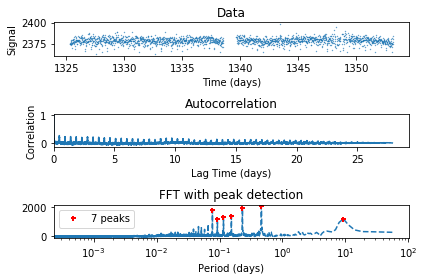

In [40]:
obj.plot_data_autocol_ft(interactive=True)

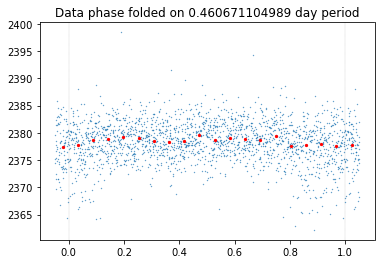

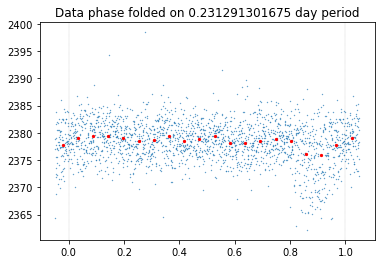

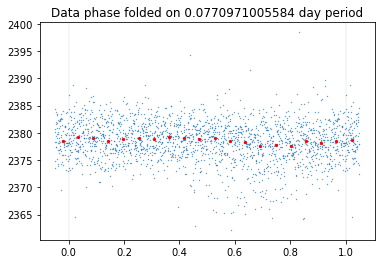

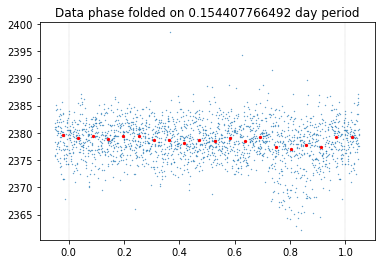

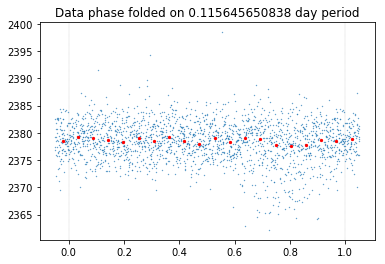

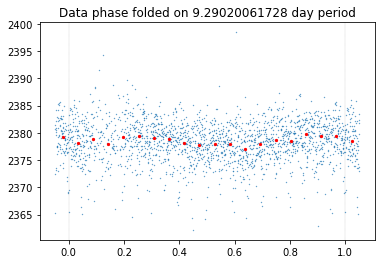

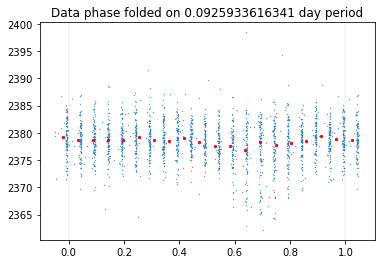

In [41]:
obj.plot_phase_folded_lcs(interactive=True)

In [42]:
obj.periods

[0.4606711049892868,
 0.2312913016751191,
 0.07709710055837303,
 0.15440776649225402,
 0.11564565083755955,
 9.29020061728395,
 0.09259336163405932]

In [43]:
obj.log_peaks()

In [44]:
obj.save_and_log_object()

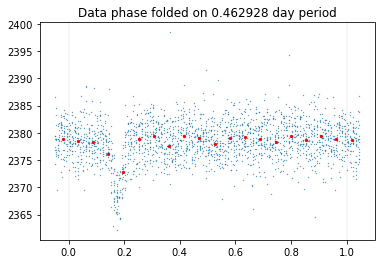

In [45]:
obj.plot_phase_folded_lc(period=0.4629280, interactive=True, epoch=2458348.87200)

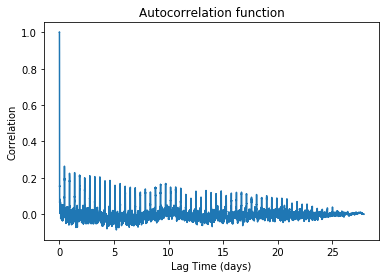

In [46]:
obj.plot_autocol(interactive=True)

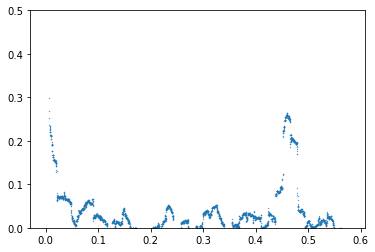

In [51]:
fig, ax = plt.subplots()
npoints = 5000
ax.scatter(obj.lag_timeseries[:npoints], obj.correlations[:npoints], s=0.1)
ax.set_ylim([0,0.5])
ax.set_xlim()
plt.show()